In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [3]:
csv_file = "5000 stars with Metal.csv" 
df = pd.read_csv(csv_file, sep=",")
# individual photometry filters
u = df['u']
g = df['g']
r = df['r']
i = df['i']
z = df['z']

# color indices
u_g = u - g
g_r = g - r
r_i = r - i
i_z = i - z

# u_g = u_g[:-19500]
# g_r = g_r[:-19500]
# r_i = r_i[:-19500]
# i_z = i_z[:-19500]

# Effective temperature of star
temperature = df['Teff']

metallicity = df['FeH']

color_filters_df = pd.DataFrame()
color_filters_df['u_g'] = u_g
color_filters_df['g_r'] = g_r
color_filters_df['r_i'] = r_i
color_filters_df['i_z'] = i_z

# Effective temperature of star
color_filters_df['temperature'] = df['Teff']
color_filters_df['metallicity'] = df['FeH']

In [4]:
# remove outliers by removing all data points that are outside 25th percentile - 75th percentile range
dropped_rows = set()

# TEMPERATURE OUTLIERS    
Q1_temp = color_filters_df['temperature'].quantile(0.25)
Q3_temp = color_filters_df['temperature'].quantile(0.75)
IQR = Q3_temp - Q1_temp
lower = Q1_temp - 1.5*IQR
upper = Q3_temp + 1.5*IQR

upper_array = np.where(color_filters_df['temperature']>=upper)[0]
lower_array = np.where(color_filters_df['temperature']<=lower)[0]

for element in upper_array:
    dropped_rows.add(element)
for element in lower_array:
    dropped_rows.add(element)

# U_G OUTLIERS
Q1_temp = color_filters_df['u_g'].quantile(0.25)
Q3_temp = color_filters_df['u_g'].quantile(0.75)
IQR = Q3_temp - Q1_temp
lower = Q1_temp - 1.5*IQR
upper = Q3_temp + 1.5*IQR

upper_array = np.where(color_filters_df['u_g']>=upper)[0]
lower_array = np.where(color_filters_df['u_g']<=lower)[0]

for element in upper_array:
    dropped_rows.add(element)
for element in lower_array:
    dropped_rows.add(element)
    
# G_R OUTLIERS
Q1_temp = color_filters_df['g_r'].quantile(0.25)
Q3_temp = color_filters_df['g_r'].quantile(0.75)
IQR = Q3_temp - Q1_temp
lower = Q1_temp - 1.5*IQR
upper = Q3_temp + 1.5*IQR

upper_array = np.where(color_filters_df['g_r']>=upper)[0]
lower_array = np.where(color_filters_df['g_r']<=lower)[0]

for element in upper_array:
    dropped_rows.add(element)
for element in lower_array:
    dropped_rows.add(element)
    
# R_I OUTLIERS
Q1_temp = color_filters_df['r_i'].quantile(0.25)
Q3_temp = color_filters_df['r_i'].quantile(0.75)
IQR = Q3_temp - Q1_temp
lower = Q1_temp - 1.5*IQR
upper = Q3_temp + 1.5*IQR

upper_array = np.where(color_filters_df['r_i']>=upper)[0]
lower_array = np.where(color_filters_df['r_i']<=lower)[0]

for element in upper_array:
    dropped_rows.add(element)
for element in lower_array:
    dropped_rows.add(element) 

# I_Z OUTLIERS
Q1_temp = color_filters_df['i_z'].quantile(0.25)
Q3_temp = color_filters_df['i_z'].quantile(0.75)
IQR = Q3_temp - Q1_temp
lower = Q1_temp - 1.5*IQR
upper = Q3_temp + 1.5*IQR

upper_array = np.where(color_filters_df['i_z']>=upper)[0]
lower_array = np.where(color_filters_df['i_z']<=lower)[0]

for element in upper_array:
    dropped_rows.add(element)
for element in lower_array:
    dropped_rows.add(element) 

color_filters_df.drop(dropped_rows, inplace=True)
print(color_filters_df.sort_values(by=['temperature'], ascending=False))

          u_g      g_r      r_i      i_z  temperature  metallicity
4945  0.76746 -0.24734 -0.11907 -0.27927        10046         0.15
4281  0.04572 -0.22951 -0.22841 -0.35002         9899         0.09
268  -0.10296 -0.32892 -0.26084 -0.25358         9899         0.09
3492  0.82290  0.35244 -0.10047 -0.06187         9899         0.09
2198 -0.12224 -0.29705 -0.24983 -0.29623         9899         0.09
...       ...      ...      ...      ...          ...          ...
2749  2.58630  1.34471  0.85426  0.46798         3690         0.05
3036  2.45680  1.37618  0.89036  0.48009         3690         0.05
3922  1.01937  0.49129  0.41187  0.32877         3690         0.05
1769  1.68871  1.19518  0.80669  0.50409         3690         0.05
3602  1.14681  0.55537  0.55351  0.47940         3690         0.05

[4306 rows x 6 columns]


When your data fits well with a polynomial regression model of a very high degree, such as the 10th degree in your case, it suggests that there is a complex and possibly nonlinear relationship between your independent and dependent variables. In other words, a simple linear relationship (a straight line) is not sufficient to capture the patterns and variations in your data.

A high-degree polynomial regression can produce a curve that can flexibly fit your data points very closely. Each additional degree of freedom in the polynomial allows the model to adjust to the specific data points, resulting in a potentially better fit to the training data.

However, there are some important considerations to keep in mind:

    Overfitting: While a high-degree polynomial regression can fit the training data extremely well, it may not generalize well to unseen data (i.e., overfitting). The model may capture noise in the training data rather than the underlying true relationship, leading to poor performance on new, unseen data.

    Complexity: High-degree polynomial models can become very complex and difficult to interpret. They may not provide meaningful insights into the relationship between variables.

    Extrapolation: Extrapolating beyond the range of your training data with a high-degree polynomial can yield unreliable predictions because the model might produce extreme and unrealistic values.

To mitigate these issues, you can consider techniques like cross-validation to assess how well your high-degree polynomial model generalizes to new data, or you can explore alternative regression techniques that handle nonlinear relationships, such as spline regression, kernel regression, or decision tree-based models.

In summary, fitting your data well with a high-degree polynomial regression indicates a complex relationship in your data, but it also requires careful consideration of overfitting and the appropriateness of such a model for your specific application.

Printing u-g values


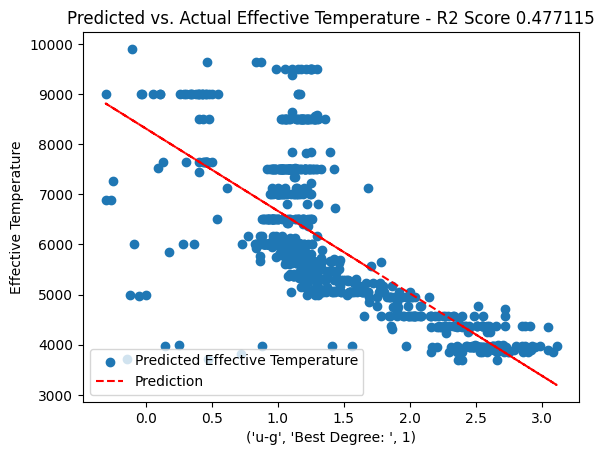

In [9]:
x_train, x_test, y_train, y_test = train_test_split(color_filters_df["u_g"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

print("Printing u-g values")
for i in range(1, 2):
    poly = PolynomialFeatures(degree=i)

    x_train_tf = poly.fit_transform(x_train_reshape)
    x_test_tf = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train_tf, y_train)

    predictions = model.predict(x_test_tf)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

description = "u-g", "Best Degree: ", best_degree

plt.scatter(x_test, y_test, label="Predicted Effective Temperature")
plt.plot(x_test, best_prediction, color='red', linestyle='--', label='Prediction')
plt.xlabel(description)
plt.ylabel('Effective Temperature')
plt.title('Predicted vs. Actual Effective Temperature - R2 Score {:2f}'.format(best_score))
plt.legend()
plt.show()

Printing g-r values


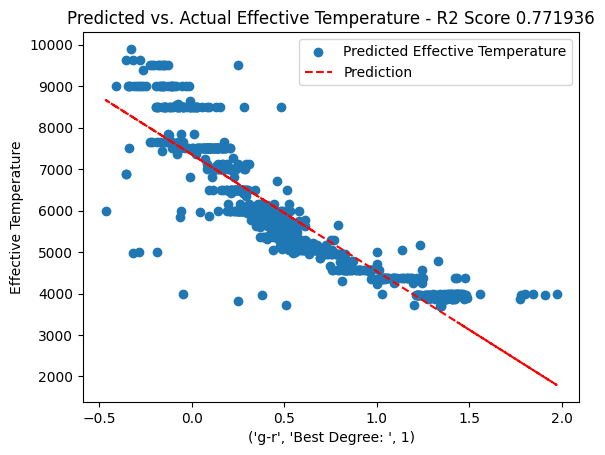

In [11]:
x_train, x_test, y_train, y_test = train_test_split(color_filters_df["g_r"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

print("Printing g-r values")
for i in range(1, 2):
    poly = PolynomialFeatures(degree=i)

    x_train_tf = poly.fit_transform(x_train_reshape)
    x_test_tf = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train_tf, y_train)

    predictions = model.predict(x_test_tf)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

description = "g-r", "Best Degree: ", best_degree

plt.scatter(x_test, y_test, label="Predicted Effective Temperature")
plt.plot(x_test, best_prediction, color='red', linestyle='--', label='Prediction')
plt.xlabel(description)
plt.ylabel('Effective Temperature')
plt.title('Predicted vs. Actual Effective Temperature - R2 Score {:2f}'.format(best_score))
plt.legend()
plt.show()

Printing r-i values


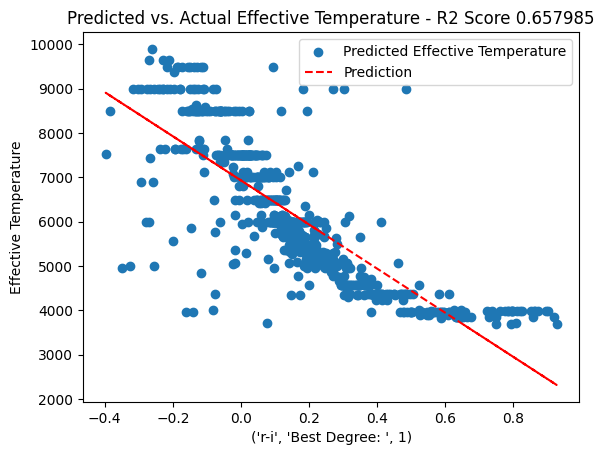

In [12]:
x_train, x_test, y_train, y_test = train_test_split(color_filters_df["r_i"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

print("Printing r-i values")
for i in range(1, 2):
    poly = PolynomialFeatures(degree=i)

    x_train_tf = poly.fit_transform(x_train_reshape)
    x_test_tf = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train_tf, y_train)

    predictions = model.predict(x_test_tf)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

description = "r-i", "Best Degree: ", best_degree

plt.scatter(x_test, y_test, label="Predicted Effective Temperature")
plt.plot(x_test, best_prediction, color='red', linestyle='--', label='Prediction')
plt.xlabel(description)
plt.ylabel('Effective Temperature')
plt.title('Predicted vs. Actual Effective Temperature - R2 Score {:2f}'.format(best_score))
plt.legend()
plt.show()

Printing i-z values


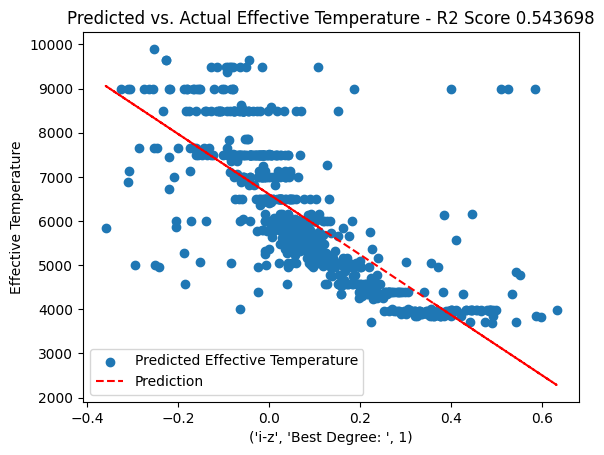

In [13]:
x_train, x_test, y_train, y_test = train_test_split(color_filters_df["i_z"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

print("Printing i-z values")
for i in range(1, 2):
    poly = PolynomialFeatures(degree=i)

    x_train_tf = poly.fit_transform(x_train_reshape)
    x_test_tf = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train_tf, y_train)

    predictions = model.predict(x_test_tf)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

description = "i-z", "Best Degree: ", best_degree

plt.scatter(x_test, y_test, label="Predicted Effective Temperature")
plt.plot(x_test, best_prediction, color='red', linestyle='--', label='Prediction')
plt.xlabel(description)
plt.ylabel('Effective Temperature')
plt.title('Predicted vs. Actual Effective Temperature - R2 Score {:2f}'.format(best_score))
plt.legend()
plt.show()

In [15]:
ug_gr = pd.DataFrame()
ug_gr = color_filters_df["u_g"] + color_filters_df["metallicity"]

x_train, x_test, y_train, y_test = train_test_split(ug_gr, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

u_g_x_train, u_g_x_test, u_g_y_train, u_g_y_test = train_test_split(color_filters_df["u_g"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
u_g_x_train_reshape = u_g_x_train.values.reshape(-1, 1) 
u_g_x_test_reshape = u_g_x_test.values.reshape(-1, 1)

g_r_x_train, g_r_x_test, g_r_y_train, g_r_y_test = train_test_split(color_filters_df["metallicity"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
g_r_x_train_reshape = g_r_x_train.values.reshape(-1, 1) 
g_r_x_test_reshape = g_r_x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 2):
    poly = PolynomialFeatures(degree=i)

    x_train_tf = poly.fit_transform(x_train_reshape)
    x_test_tf = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train_tf, y_train)

    predictions = model.predict(x_test_tf)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

import plotly.graph_objects as go
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=u_g_x_test, y=g_r_x_test, z=u_g_y_test, mode='markers', name='Stars')])

# fig.add_trace(go.Scatter3d(
#     x=u_g_x_test, 
#     y=g_r_x_test, 
#     z=best_prediction,
#     mode='lines',
#     name='Best fit line'
# ))

# Annotation
description = 'u-g, metallicity vs Effective Temperature<br>'
description += f'Best Degree: {best_degree}\n<br>'
description += f'R-squared Score: {best_score:.2f}<br>'

# Add a text annotation
fig.add_annotation(
    text=description,
    xref="paper", yref="paper",
    x=0.99, y=0.1,
    showarrow=False,
    font=dict(size=12, color="black"),
    bgcolor="lightgrey",
    opacity=0.8
)

# Customize the appearance if needed
fig.update_traces(marker=dict(size=5, opacity=0.5))

# Add labels
fig.update_layout(scene=dict(xaxis_title='u-g', yaxis_title='metallicity', zaxis_title='Effective Temperature'))

# Show the interactive plot
fig.show()

In [206]:
ug_ri = pd.DataFrame()
ug_ri = color_filters_df["g_r"] + color_filters_df["metallicity"]

x_train, x_test, y_train, y_test = train_test_split(ug_ri, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

u_g_x_train, u_g_x_test, u_g_y_train, u_g_y_test = train_test_split(color_filters_df["g_r"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
u_g_x_train_reshape = u_g_x_train.values.reshape(-1, 1) 
u_g_x_test_reshape = u_g_x_test.values.reshape(-1, 1)

r_i_x_train, r_i_x_test, r_i_y_train, r_i_y_test = train_test_split(color_filters_df["metallicity"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
r_i_x_train_reshape = r_i_x_train.values.reshape(-1, 1) 
r_i_x_test_reshape = r_i_x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 2):
    poly = PolynomialFeatures(degree=i)

    x_train_tf = poly.fit_transform(x_train_reshape)
    x_test_tf = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train_tf, y_train)

    predictions = model.predict(x_test_tf)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

import plotly.graph_objects as go
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=u_g_x_test, y=r_i_x_test, z=u_g_y_test, mode='markers', name='Stars')])

# fig.add_trace(go.Scatter3d(
#     x=u_g_x_test, 
#     y=r_i_x_test, 
#     z=best_prediction,
#     mode='lines',
#     name='Best fit line'
# ))

# Annotation
description = 'g-r, metallicity vs Effective Temperature<br>'
description += f'Best Degree: {best_degree}\n<br>'
description += f'R-squared Score: {best_score:.2f}<br>'

# Add a text annotation
fig.add_annotation(
    text=description,
    xref="paper", yref="paper",
    x=0.99, y=0.1,
    showarrow=False,
    font=dict(size=12, color="black"),
    bgcolor="lightgrey",
    opacity=0.8
)

# Customize the appearance if needed
fig.update_traces(marker=dict(size=5, opacity=0.5))

# Add labels
fig.update_layout(scene=dict(xaxis_title='g-r', yaxis_title='metallicity', zaxis_title='Effective Temperature'))

# Show the interactive plot
fig.show()

In [189]:
ug_iz = pd.DataFrame()
ug_iz = color_filters_df["r_i"] + color_filters_df["metallicity"]

x_train, x_test, y_train, y_test = train_test_split(ug_iz, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

u_g_x_train, u_g_x_test, u_g_y_train, u_g_y_test = train_test_split(color_filters_df["r_i"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
u_g_x_train_reshape = u_g_x_train.values.reshape(-1, 1) 
u_g_x_test_reshape = u_g_x_test.values.reshape(-1, 1)

i_z_x_train, i_z_x_test, i_z_y_train, i_z_y_test = train_test_split(color_filters_df["metallicity"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
i_z_x_train_reshape = i_z_x_train.values.reshape(-1, 1) 
i_z_x_test_reshape = i_z_x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 2):
    poly = PolynomialFeatures(degree=i)

    x_train_tf = poly.fit_transform(x_train_reshape)
    x_test_tf = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train_tf, y_train)

    predictions = model.predict(x_test_tf)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

import plotly.graph_objects as go
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=u_g_x_test, y=i_z_x_test, z=u_g_y_test, mode='markers', name='Stars')])

# fig.add_trace(go.Scatter3d(
#     x=u_g_x_test, 
#     y=i_z_x_test, 
#     z=best_prediction,
#     mode='lines',
#     name='Best fit line'
# ))

# Annotation
description = 'r-i, metallicity vs Effective Temperature<br>'
description += f'Best Degree: {best_degree}\n<br>'
description += f'R-squared Score: {best_score:.2f}<br>'

# Add a text annotation
fig.add_annotation(
    text=description,
    xref="paper", yref="paper",
    x=0.99, y=0.1,
    showarrow=False,
    font=dict(size=12, color="black"),
    bgcolor="lightgrey",
    opacity=0.8
)

# Customize the appearance if needed
fig.update_traces(marker=dict(size=5, opacity=0.5))

# Add labels
fig.update_layout(scene=dict(xaxis_title='r-i', yaxis_title='metallicity', zaxis_title='Effective Temperature'))

# Show the interactive plot
fig.show()

In [191]:
gr_ri = pd.DataFrame()
gr_ri = color_filters_df["i_z"] + color_filters_df["metallicity"]

x_train, x_test, y_train, y_test = train_test_split(gr_ri, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

g_r_x_train, g_r_x_test, g_r_y_train, g_r_y_test = train_test_split(color_filters_df["i_z"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
g_r_x_train_reshape = g_r_x_train.values.reshape(-1, 1) 
g_r_x_test_reshape = g_r_x_test.values.reshape(-1, 1)

r_i_x_train, r_i_x_test, r_i_y_train, r_i_y_test = train_test_split(color_filters_df["metallicity"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
r_i_x_train_reshape = r_i_x_train.values.reshape(-1, 1) 
r_i_x_test_reshape = r_i_x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 2):
    poly = PolynomialFeatures(degree=i)

    x_train_tf = poly.fit_transform(x_train_reshape)
    x_test_tf = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train_tf, y_train)

    predictions = model.predict(x_test_tf)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

import plotly.graph_objects as go
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=g_r_x_test, y=r_i_x_test, z=g_r_y_test, mode='markers', name='Stars')])

# fig.add_trace(go.Scatter3d(
#     x=g_r_x_test, 
#     y=r_i_x_test, 
#     z=best_prediction,
#     mode='lines',
#     name='Best fit line'
# ))

# Annotation
description = 'i-z, metallicity vs Effective Temperature<br>'
description += f'Best Degree: {best_degree}\n<br>'
description += f'R-squared Score: {best_score:.2f}<br>'

# Add a text annotation
fig.add_annotation(
    text=description,
    xref="paper", yref="paper",
    x=0.99, y=0.1,
    showarrow=False,
    font=dict(size=12, color="black"),
    bgcolor="lightgrey",
    opacity=0.8
)

# Customize the appearance if needed
fig.update_traces(marker=dict(size=5, opacity=0.5))

# Add labels
fig.update_layout(scene=dict(xaxis_title='i-z', yaxis_title='metallicity', zaxis_title='Effective Temperature'))

# Show the interactive plot
fig.show()

In [14]:
gr_iz = pd.DataFrame()
gr_iz = color_filters_df["g_r"] + color_filters_df["i_z"]

x_train, x_test, y_train, y_test = train_test_split(gr_iz, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

g_r_x_train, g_r_x_test, g_r_y_train, g_r_y_test = train_test_split(color_filters_df["g_r"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
g_r_x_train_reshape = g_r_x_train.values.reshape(-1, 1) 
g_r_x_test_reshape = g_r_x_test.values.reshape(-1, 1)

i_z_x_train, i_z_x_test, i_z_y_train, i_z_y_test = train_test_split(color_filters_df["i_z"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
i_z_x_train_reshape = i_z_x_train.values.reshape(-1, 1) 
i_z_x_test_reshape = i_z_x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train_tf = poly.fit_transform(x_train_reshape)
    x_test_tf = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train_tf, y_train)

    predictions = model.predict(x_test_tf)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

import plotly.graph_objects as go
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=g_r_x_test, y=i_z_x_test, z=g_r_y_test, mode='markers', name='Stars')])

fig.add_trace(go.Scatter3d(
    x=g_r_x_test, 
    y=i_z_x_test, 
    z=best_prediction,
    mode='lines',
    name='Best fit line'
))

# Annotation
description = 'g-r, i-z vs Effective Temperature<br>'
description += f'Best Degree: {best_degree}\n<br>'
description += f'R-squared Score: {best_score:.2f}<br>'

# Add a text annotation
fig.add_annotation(
    text=description,
    xref="paper", yref="paper",
    x=0.99, y=0.1,
    showarrow=False,
    font=dict(size=12, color="black"),
    bgcolor="lightgrey",
    opacity=0.8
)

# Customize the appearance if needed
fig.update_traces(marker=dict(size=5, opacity=0.5))

# Add labels
fig.update_layout(scene=dict(xaxis_title='g-r', yaxis_title='i-z', zaxis_title='Effective Temperature'))

# Show the interactive plot
fig.show()

In [9]:
ri_iz = pd.DataFrame()
ri_iz = color_filters_df["r_i"] + color_filters_df["i_z"]

x_train, x_test, y_train, y_test = train_test_split(ri_iz, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

r_i_x_train, r_i_x_test, r_i_y_train, r_i_y_test = train_test_split(color_filters_df["r_i"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
r_i_x_train_reshape = r_i_x_train.values.reshape(-1, 1) 
r_i_x_test_reshape = r_i_x_test.values.reshape(-1, 1)

i_z_x_train, i_z_x_test, i_z_y_train, i_z_y_test = train_test_split(color_filters_df["i_z"], color_filters_df["temperature"], test_size=0.2, random_state=42) 
i_z_x_train_reshape = i_z_x_train.values.reshape(-1, 1) 
i_z_x_test_reshape = i_z_x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train_tf = poly.fit_transform(x_train_reshape)
    x_test_tf = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train_tf, y_train)

    predictions = model.predict(x_test_tf)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

import plotly.graph_objects as go
# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(x=r_i_x_test, y=i_z_x_test, z=g_r_y_test, mode='markers', name='Stars')])

fig.add_trace(go.Scatter3d(
    x=g_r_x_test, 
    y=i_z_x_test, 
    z=best_prediction,
    mode='lines',
    name='Best fit line'
))

# Annotation
description = 'r-z, i-z vs Effective Temperature<br>'
description += f'Best Degree: {best_degree}\n<br>'
description += f'R-squared Score: {best_score:.2f}<br>'

# Add a text annotation
fig.add_annotation(
    text=description,
    xref="paper", yref="paper",
    x=0.99, y=0.1,
    showarrow=False,
    font=dict(size=12, color="black"),
    bgcolor="lightgrey",
    opacity=0.8
)

# Customize the appearance if needed
fig.update_traces(marker=dict(size=5, opacity=0.5))

# Add labels
fig.update_layout(scene=dict(xaxis_title='r-z', yaxis_title='i-z', zaxis_title='Effective Temperature'))

# Show the interactive plot
fig.show()

In [22]:
ug_gr_ri = pd.DataFrame()
ug_gr_ri = color_filters_df["u_g"] + color_filters_df["g_r"] + color_filters_df["r_i"]

x_train, x_test, y_train, y_test = train_test_split(ug_gr_ri, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train = poly.fit_transform(x_train_reshape)
    x_test = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

print("R score of u-g, g-r, r-i vs Effective Temperature: {:2f}".format(best_score))

R score of u-g, g-r, r-i vs Effective Temperature: 0.776623


In [23]:
ug_gr_ri = pd.DataFrame()
ug_gr_ri = color_filters_df["u_g"] + color_filters_df["g_r"] + color_filters_df["r_i"]

x_train, x_test, y_train, y_test = train_test_split(ug_gr_ri, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train = poly.fit_transform(x_train_reshape)
    x_test = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

print("R score of u-g, g-r, r-i vs Effective Temperature: {:2f}".format(best_score))

R score of u-g, g-r, r-i vs Effective Temperature: 0.776623


In [10]:
ug_gr_iz = pd.DataFrame()
ug_gr_iz = color_filters_df["u_g"] + color_filters_df["g_r"] + color_filters_df["i_z"]

x_train, x_test, y_train, y_test = train_test_split(ug_gr_iz, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train = poly.fit_transform(x_train_reshape)
    x_test = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

print("R score of u-g, g-r, i-z vs Effective Temperature: {:2f}".format(best_score))

R score of u-g, g-r, i-z vs Effective Temperature: 0.657141


In [25]:
ug_ri_iz = pd.DataFrame()
ug_ri_iz = color_filters_df["u_g"] + color_filters_df["r_i"] + color_filters_df["i_z"]

x_train, x_test, y_train, y_test = train_test_split(ug_ri_iz, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train = poly.fit_transform(x_train_reshape)
    x_test = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

print("R score of u-g, r-i, i-z vs Effective Temperature: {:2f}".format(best_score))

R score of u-g, r-i, i-z vs Effective Temperature: 0.683175


In [36]:
gr_ri_iz = pd.DataFrame()
gr_ri_iz = color_filters_df["g_r"] + color_filters_df["r_i"] + color_filters_df["i_z"]

x_train, x_test, y_train, y_test = train_test_split(gr_ri_iz, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train = poly.fit_transform(x_train_reshape)
    x_test = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

print("R score of g-r, r-i, i-z vs Effective Temperature: {:2f}".format(best_score))

R score of g-r, r-i, i-z vs Effective Temperature: 0.849331


In [32]:
ug_gr_ri_iz = pd.DataFrame()
ug_gr_ri_iz = color_filters_df["u_g"] + color_filters_df["g_r"] + color_filters_df["r_i"] + color_filters_df["i_z"] + color_filters_df["metallicity"] 

x_train, x_test, y_train, y_test = train_test_split(ug_gr_ri_iz, color_filters_df["temperature"], test_size=0.2, random_state=42) 
x_train_reshape = x_train.values.reshape(-1, 1) 
x_test_reshape = x_test.values.reshape(-1, 1)

best_score = 0
best_prediction = None
best_degree = 0

for i in range(1, 11):
    poly = PolynomialFeatures(degree=i)

    x_train = poly.fit_transform(x_train_reshape)
    x_test = poly.fit_transform(x_test_reshape)

    model = LinearRegression()
    model.fit(x_train, y_train)

    predictions = model.predict(x_test)

    r2 = r2_score(y_test, predictions)
    
    if r2 > best_score:
        best_score = r2
        best_prediction = predictions
        best_degree = i

print("R score of u-g, g-r, r-i, i-z vs Effective Temperature: {:2f}".format(best_score))

R score of u-g, g-r, r-i, i-z vs Effective Temperature: 0.677790
